In [2]:
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table
import seaborn as sns

In [12]:
# This is the Noise selecting with HDBSCAN
tab = Table.read("../JPLUS_data_6arc-HDBnoise.tab", format="ascii.tab")
tab.colnames

['Tile',
 'Number',
 'RA',
 'Dec',
 'petro_radius',
 'kron_radius',
 'rSDSS_MAG_APER_6_0',
 'gSDSS_MAG_APER_6_0',
 'iSDSS_MAG_APER_6_0',
 'zSDSS_MAG_APER_6_0',
 'uJAVA_MAG_APER_6_0',
 'J0378_MAG_APER_6_0',
 'J0395_MAG_APER_6_0',
 'J0410_MAG_APER_6_0',
 'J0430_MAG_APER_6_0',
 'J0515_MAG_APER_6_0',
 'J0660_MAG_APER_6_0',
 'J0861_MAG_APER_6_0',
 'rSDSS_MAG_APER_6_0_err',
 'gSDSS_MAG_APER_6_0_err',
 'iSDSS_MAG_APER_6_0_err',
 'zSDSS_MAG_APER_6_0_err',
 'uJAVA_MAG_APER_6_0_err',
 'J0378_MAG_APER_6_0_err',
 'J0395_MAG_APER_6_0_err',
 'J0410_MAG_APER_6_0_err',
 'J0430_MAG_APER_6_0_err',
 'J0515_MAG_APER_6_0_err',
 'J0660_MAG_APER_6_0_err',
 'J0861_MAG_APER_6_0_err',
 'rSDSS_FLAGS',
 'gSDSS_FLAGS',
 'iSDSS_FLAGS',
 'zSDSS_FLAGS',
 'uJAVA_FLAGS',
 'J0378_FLAGS',
 'J0395_FLAGS',
 'J0410_FLAGS',
 'J0430_FLAGS',
 'J0515_FLAGS',
 'J0660_FLAGS',
 'J0861_FLAGS',
 'rSDSS_MASK_FLAGS',
 'gSDSS_MASK_FLAGS',
 'iSDSS_MASK_FLAGS',
 'zSDSS_MASK_FLAGS',
 'uJAVA_MASK_FLAGS',
 'J0378_MASK_FLAGS',
 'J0395_MASK_F

In [7]:
# definition for the colors
def colour(table, f1, f2, f3, f4):
    xcolour = table[f1] - table[f2]
    ycolour = table[f3] - table[f4]
    return xcolour, ycolour

In [8]:
cx, cy = colour(tab, "rSDSS_MAG_APER_6_0", "iSDSS_MAG_APER_6_0", "rSDSS_MAG_APER_6_0", "J0660_MAG_APER_6_0")

Appliyng the selection criteria to selecting H$\alpha$ emitters. We used the same procedure in Wevers et al. (2017). The objects with H$\alpha$ excess meet the condition:

 $(r - H\alpha)_{obs} - (r - H\alpha)_{fit} \geq C \times \sqrt{\sigma^2_s - \sigma^2_{phot}}$                            

In [13]:
# Errors of the colors
def errormag(table, ef1, ef2, ef3, ef4):
    excolour = np.sqrt(table[ef1]**2 + table[ef1]**2)
    eycolour = np.sqrt(table[ef3]**2 + table[ef4]**2)
    return excolour, eycolour

In [15]:
ecx, ecy = colour(tab, "rSDSS_MAG_APER_6_0_err", "iSDSS_MAG_APER_6_0_err", "rSDSS_MAG_APER_6_0_err", "J0660_MAG_APER_6_0_err")
ecy

-0.027000000000000003
-0.011
-0.025
-0.019
-0.005000000000000001
-0.011
-0.024
-0.008999999999999998
-0.005
-0.002
-0.009000000000000001


Defining the selected criterion

In [69]:
C = 2.0 # Is the constant
sigma_s = 0.13523455228838352 # The root mean squared value of the residuals around the fit
crite = C * np.sqrt(sigma_s**2 + ecy**2) + (0.43880 * cx - 0.01927)
mask = cy >= crite
# Applying mask to the data
tab_ha = tab[mask]
tab_ha

Tile,Number,RA,Dec,petro_radius,kron_radius,rSDSS_MAG_APER_6_0,gSDSS_MAG_APER_6_0,iSDSS_MAG_APER_6_0,zSDSS_MAG_APER_6_0,uJAVA_MAG_APER_6_0,J0378_MAG_APER_6_0,J0395_MAG_APER_6_0,J0410_MAG_APER_6_0,J0430_MAG_APER_6_0,J0515_MAG_APER_6_0,J0660_MAG_APER_6_0,J0861_MAG_APER_6_0,rSDSS_MAG_APER_6_0_err,gSDSS_MAG_APER_6_0_err,iSDSS_MAG_APER_6_0_err,zSDSS_MAG_APER_6_0_err,uJAVA_MAG_APER_6_0_err,J0378_MAG_APER_6_0_err,J0395_MAG_APER_6_0_err,J0410_MAG_APER_6_0_err,J0430_MAG_APER_6_0_err,J0515_MAG_APER_6_0_err,J0660_MAG_APER_6_0_err,J0861_MAG_APER_6_0_err,rSDSS_FLAGS,gSDSS_FLAGS,iSDSS_FLAGS,zSDSS_FLAGS,uJAVA_FLAGS,J0378_FLAGS,J0395_FLAGS,J0410_FLAGS,J0430_FLAGS,J0515_FLAGS,J0660_FLAGS,J0861_FLAGS,rSDSS_MASK_FLAGS,gSDSS_MASK_FLAGS,iSDSS_MASK_FLAGS,zSDSS_MASK_FLAGS,uJAVA_MASK_FLAGS,J0378_MASK_FLAGS,J0395_MASK_FLAGS,J0410_MASK_FLAGS,J0430_MASK_FLAGS,J0515_MASK_FLAGS,J0660_MASK_FLAGS,J0861_MASK_FLAGS,HDBSCAN_opt_labels
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
69300,4650,181.203143891,56.5986465777,4.61999989,3.5,18.772,18.995,18.918,18.876,18.867,18.75,19.11,19.025,18.876,19.103,18.424,19.241,0.044,0.048,0.127,0.153,0.07,0.067,0.092,0.09,0.077,0.098,0.058,0.193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
69300,4883,180.386199535,56.6156332075,4.61999989,3.5,18.223,18.578,18.097,18.226,18.873,18.782,18.861,18.915,18.529,18.565,18.038,18.024,0.028,0.034,0.063,0.087,0.071,0.069,0.075,0.083,0.058,0.063,0.043,0.066,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,-1
62913,9018,145.413029402,30.2018462077,4.61999989,3.5,18.198,18.724,17.88,17.565,19.72,19.696,19.648,19.443,19.121,18.483,17.913,17.683,0.015,0.018,0.027,0.053,0.133,0.132,0.128,0.111,0.083,0.053,0.038,0.048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
69300,6939,182.175893812,56.893168546,4.61999989,3.5,18.929,19.21,19.005,18.693,19.59,19.171,19.164,19.172,19.183,19.113,18.746,18.969,0.051,0.059,0.14,0.131,0.128,0.094,0.095,0.101,0.1,0.099,0.078,0.151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
62913,12503,146.556325824,30.3938127448,4.61999989,3.5,18.392,18.793,18.358,18.175,20.117,19.42,19.476,19.127,19.008,18.602,18.2,18.371,0.017,0.019,0.04,0.09,0.192,0.107,0.113,0.087,0.078,0.059,0.048,0.088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
62913,12695,146.605577591,30.4043351356,4.61999989,3.5,18.817,19.218,18.662,18.38,19.859,19.793,19.709,19.495,19.618,19.013,18.602,18.629,0.025,0.026,0.052,0.109,0.153,0.146,0.138,0.12,0.132,0.083,0.068,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
62913,12904,145.606100717,30.4099688594,5.27999973,4.14031124,18.034,18.453,17.877,17.598,19.183,19.288,19.155,18.827,18.729,18.201,17.816,17.648,0.014,0.015,0.028,0.056,0.099,0.11,0.097,0.078,0.071,0.05,0.041,0.054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
69300,10014,180.51802125,56.6135924354,7.91999912,4.80425549,18.373,18.807,18.29,18.144,19.538,19.306,19.337,19.068,18.888,18.655,18.217,18.098,0.032,0.042,0.074,0.08,0.125,0.107,0.112,0.094,0.078,0.068,0.05,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
62913,13854,145.698642608,30.4672593481,5.93999958,3.5,18.597,19.211,18.429,18.048,19.776,19.811,19.75,19.631,19.437,18.94,18.398,18.136,0.021,0.028,0.044,0.082,0.168,0.177,0.172,0.157,0.13,0.09,0.063,0.073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1


In [70]:
cx_ha, cy_ha = colour(tab_ha, "rSDSS_MAG_APER_6_0", "iSDSS_MAG_APER_6_0", "rSDSS_MAG_APER_6_0", "J0660_MAG_APER_6_0")

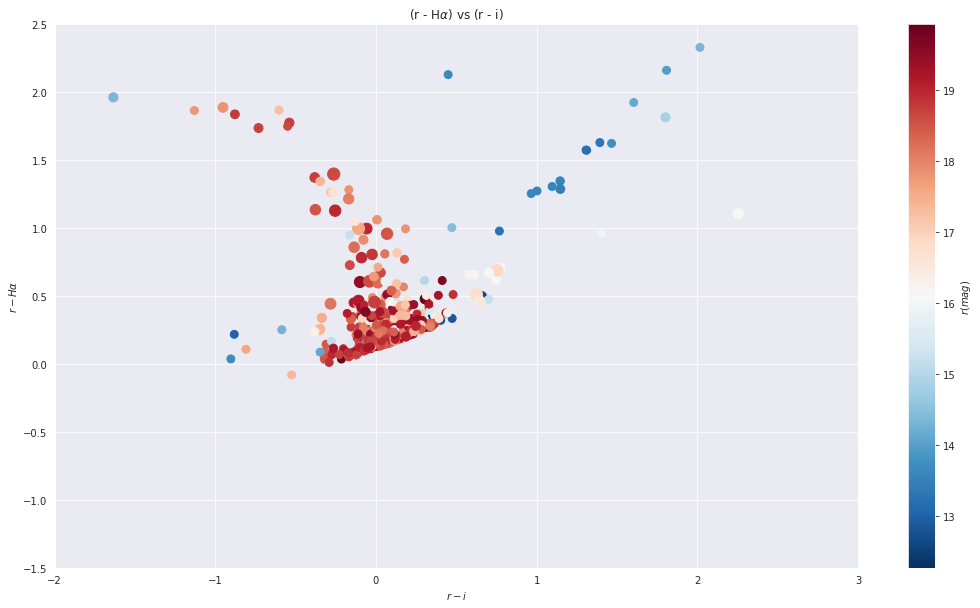

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

with sns.axes_style("darkgrid"):
    fig, ax4 = plt.subplots(figsize=(18, 10))
    scat = ax4.scatter(cx_ha, cy_ha, s=18*tab_ha["kron_radius"], 
                             c=tab_ha["rSDSS_MAG_APER_6_0"], cmap='RdBu_r')
    #ax4.plot(fit_line, 0.43880 * fit_line - 0.01927, color="k", ls="--")
    ax4.set(
    xlim=[-2.0, 3.0],
    ylim=[-1.5, 2.5],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$")
    fig.colorbar(scat, ax=ax4).set_label("$r(mag)$")
    #ax4.set_aspect("equal")
    ax4.set_title(r"(r - H$\alpha$) vs (r - i)")

In [74]:
# Save table
asciifile = "../JPLUS_data_6arc-HDBnoise_SigmaHa.tab" 
tab_ha.write(asciifile, format="ascii.tab")